# Preprocessing pipeline

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

## Starting the pipeline

In [3]:
from analysis.preprocess import PreprocessPipeline

pipeline = PreprocessPipeline(datasets_path=DATASET_PATH, disease_col_name=DISEASE_COLNAME)
pipeline.execute_pipeline()

INFO:root:Starting pipeline
INFO:root:Loading datasets
INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Loading file ../../dataset/first_disease_sel/GS/eGSE117146m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Loading file ../../dataset/first_disease_sel/MCM/MCM_GSE149607.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE85804m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE34308m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE117647m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Loading file ../../dataset/first_disease_sel/A1A/A1A_deficiency_GSE109516_pbmc.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO

## Inspecting the dataset we have built

In [5]:
dataset = pipeline.dataset
dataset

,PAPOLG,CTCF,VCAM1,ICAM3,TDP2,LPP,ERICH1,EPN2,RAB11FIP5,RRP1B,...,PRPF3,KCTD12,VRK3,NVL,SUZ12,HIVEP3,ZMPSTE24,PUM1,ARL5A,ENC1
0,0.839840,0.793465,0.240542,0.696492,0.593700,0.396923,0.368380,0.272236,0.845221,0.576661,...,0.697313,0.762053,0.596005,0.520780,0.741174,0.178401,0.823331,0.315794,0.353486,0.246098
1,0.688577,0.431003,0.291356,0.000000,0.606161,0.471982,0.418329,0.093582,0.598480,0.180595,...,0.634113,0.861569,0.888165,0.683392,0.561940,0.000000,0.278237,0.840470,0.906905,0.369848
2,0.864833,0.884107,0.177223,0.544131,0.556961,0.431948,0.263835,0.000000,0.000000,0.434094,...,0.738001,1.000000,0.262440,0.537536,0.308853,0.337394,0.763773,0.515942,0.916347,0.737249
3,0.818785,0.626306,0.311337,1.000000,0.795652,0.499970,0.543208,0.007753,0.406540,0.447967,...,0.630639,0.898412,0.869844,0.601637,0.409666,0.293786,0.826608,0.465132,0.861489,0.435134
4,0.912465,0.382713,0.019245,0.093347,0.023087,0.649332,0.229941,0.358821,0.470093,0.515081,...,0.410967,0.484976,0.600123,0.580922,0.325443,0.417252,0.333623,0.529811,0.191144,0.528251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.830626,0.892210,0.454545,0.166786,0.410428,0.936034,0.343301,0.732558,0.686567,0.731946,...,0.726891,0.342196,0.164216,0.481605,0.916877,0.520000,0.350327,0.646223,0.755387,0.032927
395,0.505800,0.245471,0.000000,0.425444,0.164579,0.176972,0.242823,0.244186,0.865672,0.483476,...,0.121849,0.029445,0.539216,0.324415,0.137280,0.192000,0.402614,0.344802,0.372624,0.617073
396,0.120650,0.323370,0.090909,0.138683,0.059132,0.138593,0.430622,0.348837,0.373134,0.503060,...,0.084034,0.142939,0.561275,0.287625,0.144836,0.328000,0.231373,0.302917,0.253485,0.618293
397,0.104408,0.141304,0.000000,0.232386,0.217011,0.309168,1.000000,0.232558,0.000000,0.328029,...,0.211485,0.030017,0.492647,0.000000,0.000000,0.184000,0.000000,0.197457,0.092522,0.000000


## Plot disease distribution

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

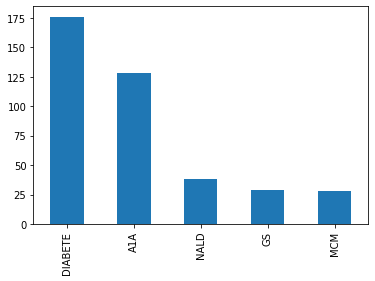

In [6]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

## Experiments

In [42]:
# getting data for disease MCM
mcm_dataset = dataset.loc[dataset.DISEASE == 'MCM']
mcm_dataset = mcm_dataset.drop(columns=['DISEASE'])

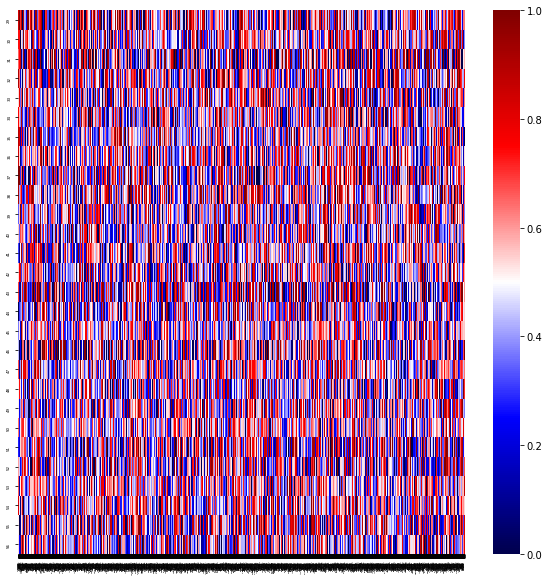

In [43]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

visuz.gene_exp.hmap(df=mcm_dataset, rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)